In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import tensorflow as tf
from tensorflow import keras
import gc
import random
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import BatchNormalization
from keras.layers import BatchNormalization
from sklearn import preprocessing
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf

In [2]:
for dirname, _, filenames in os.walk('C:\Extra project\Skin Cancer'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Extra project\Skin Cancer\HAM10000_metadata.csv
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024306.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024307.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024308.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024309.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024310.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024311.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024312.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024313.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024314.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024315.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024316.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024317.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0024318.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\

C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027290.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027291.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027292.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027293.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027294.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027295.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027296.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027297.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027298.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027299.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027300.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027301.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027302.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_1\ISIC_0027303.jpg
C:\Extra project\Skin Cancer\HAM10

C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029306.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029307.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029308.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029309.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029310.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029311.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029312.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029313.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029314.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029315.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029316.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029317.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029318.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0029319.jpg
C:\Extra project\Skin Cancer\HAM10

C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032424.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032425.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032426.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032427.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032428.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032429.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032430.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032431.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032432.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032433.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032434.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032435.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032436.jpg
C:\Extra project\Skin Cancer\HAM10000_images_part_2\ISIC_0032437.jpg
C:\Extra project\Skin Cancer\HAM10

In [3]:
cancer=pd.read_csv("C:\Extra project\Skin Cancer\HAM10000_metadata.csv")

In [4]:
cancer.fillna({'age': np.mean(cancer['age'])}, inplace=True)
image_paths=[]
for part in ("part_1","part_2"):
    image_paths+=glob.glob("C:\Extra project\Skin Cancer\HAM10000_images_"+part+"/*")
image_ids_n_paths = {os.path.splitext(os.path.basename(path))[0]:path for path in image_paths}
cancer['path']=cancer['image_id'].map(image_ids_n_paths)
labels=cancer['dx'].to_frame()
labels=pd.get_dummies(labels)

In [5]:
cancer.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,C:\Extra project\Skin Cancer\HAM10000_images_p...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,C:\Extra project\Skin Cancer\HAM10000_images_p...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,C:\Extra project\Skin Cancer\HAM10000_images_p...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,C:\Extra project\Skin Cancer\HAM10000_images_p...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,C:\Extra project\Skin Cancer\HAM10000_images_p...


In [6]:
cancer_1=cancer.copy()

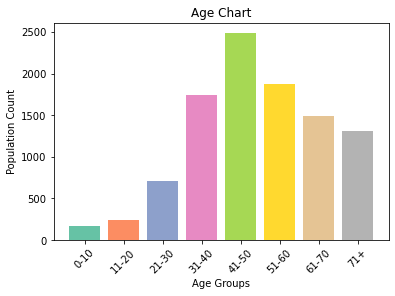

In [24]:
age_data = cancer['age']

age_groups = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']


# Initialize population counts
population_counts = [0] * len(age_groups)

# Calculate the population count for each age group
for i, group in enumerate(age_groups):
    if group == '71+':
        # Handle the last age group separately
        count = (age_data >= int(group[:-1])).sum()
    else:
        age_range = group.split('-')
        age_min, age_max = int(age_range[0]), int(age_range[1])
        count = ((age_data >= age_min) & (age_data <= age_max)).sum()
    population_counts[i] = count

# Set a custom color palette
colors = sns.color_palette('Set2', len(age_groups))

# Plotting the age chart with different colors for each bar
plt.bar(age_groups, population_counts, color=colors)
plt.xlabel('Age Groups')
plt.ylabel('Population Count')
plt.title('Age Chart')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the chart
plt.show()

C:\Softwares\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


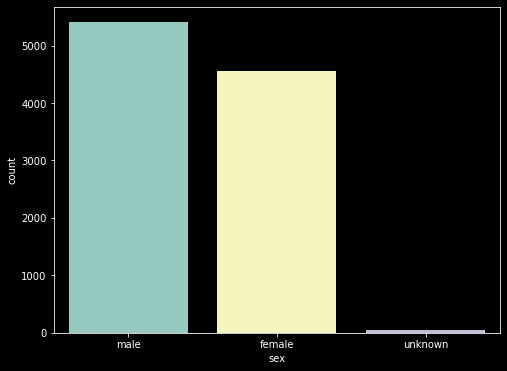

In [25]:
plt.style.use("dark_background")

plt.figure(figsize=(8, 6))
sns.countplot(cancer["sex"])
plt.show()  # Show the plot

plt.show()

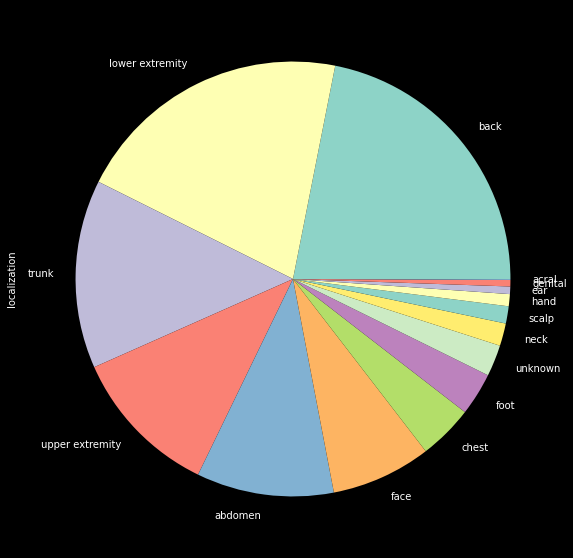

In [26]:
cancer['localization'].value_counts().plot.pie(figsize=(30,10))
plt.show()

C:\Softwares\Ananconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


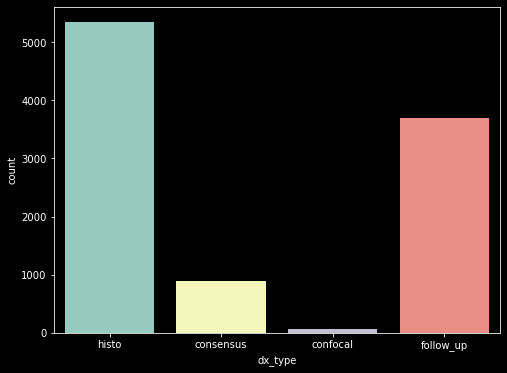

In [27]:
plt.style.use("dark_background")

plt.figure(figsize=(8, 6))
sns.countplot(cancer["dx_type"])
plt.show()  # Show the plot

plt.show()

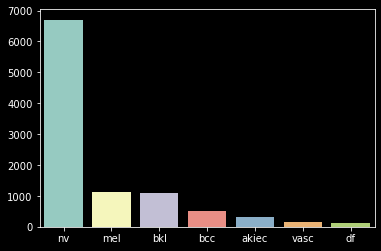

In [31]:
category_counts = cancer['dx'].value_counts()

sns.barplot(x=category_counts.index, y=category_counts.values)
plt.show()